# STEP 1: DATA PREVIEW AND CLEANING

## Step 1.1: Load the library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
!pip install squarify
import squarify

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Step 1.2: Load the csv

In [ ]:
ecom_url = '/content/drive/MyDrive/Google Colab CSV/ecommerce-retail.csv'
# Read data frame from CSV file
ecom = pd.read_csv(ecom_url)
ecom

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## Step 1.3: Check dataset info

In [ ]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Step 1.4: Check and clean columns that have null values
We found out that CustomerID column has null values in this case, let fix it in the next steps

In [ ]:
# Check null info
ecom.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [ ]:
# Drop null
ecom = ecom.dropna(subset=['CustomerID'])
ecom

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# Check null info again
ecom.isnull().any()

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool

## Step 1.5: Check data description and clean (if needed)
Check whether the data consists of any outliers

In [ ]:
ecom.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


Look like there is a negative min Quantity and UnitPrice equals to 0, which is not appropriate in this case. Let's exclude it.

In [ ]:
# Include rows from Quantity and UnitPrice column that are positive only
ecom = ecom[(ecom['Quantity'] > 0) & (ecom['UnitPrice'] > 0)]
ecom.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


# STEP 2: DATA WRANGLING

## Step 2.1: Filter columns required for analysis

In [ ]:
ecom = ecom[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]
ecom.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice
0,17850.0,12/1/2010 8:26,536365,6,2.55
1,17850.0,12/1/2010 8:26,536365,6,3.39
2,17850.0,12/1/2010 8:26,536365,8,2.75
3,17850.0,12/1/2010 8:26,536365,6,3.39
4,17850.0,12/1/2010 8:26,536365,6,3.39


## Step 2.2: Calculate total value of each invoice

In [ ]:
ecom["TotalRevenue"] = ecom["Quantity"] * ecom["UnitPrice"]
ecom.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalRevenue
0,17850.0,12/1/2010 8:26,536365,6,2.55,15.30
1,17850.0,12/1/2010 8:26,536365,6,3.39,20.34
2,17850.0,12/1/2010 8:26,536365,8,2.75,22.00
3,17850.0,12/1/2010 8:26,536365,6,3.39,20.34
4,17850.0,12/1/2010 8:26,536365,6,3.39,20.34


## Step 2.3: Turn InvoiceDate, CustomerID to right format

In [ ]:
ecom['InvoiceDate'] = pd.to_datetime(ecom['InvoiceDate'])
ecom['CustomerID'] = ecom['CustomerID'].astype(str)
ecom

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalRevenue
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
...,...,...,...,...,...,...
541904,12680.0,2011-12-09 12:50:00,581587,12,0.85,10.20
541905,12680.0,2011-12-09 12:50:00,581587,6,2.10,12.60
541906,12680.0,2011-12-09 12:50:00,581587,4,4.15,16.60
541907,12680.0,2011-12-09 12:50:00,581587,4,4.15,16.60


# STEP 3: RFM CALCULATION

## Step 3.1: Calculate recency, monetary and frequency values group by CustomerID

In [ ]:
ecom_rfm = ecom.groupby("CustomerID").agg(
    {
        "InvoiceDate": lambda date: (dt.datetime(2011, 12, 31) - date.max()).days,
        "TotalRevenue": "sum",
        "InvoiceNo": "count",
    }
)

ecom_rfm

,InvoiceDate,TotalRevenue,InvoiceNo
CustomerID,,,
12346.0,346,77183.60,1
12347.0,23,4310.00,182
12348.0,96,1797.24,31
12349.0,39,1757.55,73
12350.0,331,334.40,17
...,...,...,...
18280.0,298,180.60,10
18281.0,201,80.82,7
18282.0,28,178.05,12


## Step 3.2: Change column names for clarity

In [ ]:
new_ecom_rfm = ecom_rfm.rename(
    columns={
        "InvoiceDate": "Recency",
        "TotalRevenue": "Monetary",
        "InvoiceNo": "Frequency",
    }
)
new_ecom_rfm

,Recency,Monetary,Frequency
CustomerID,,,
12346.0,346,77183.60,1
12347.0,23,4310.00,182
12348.0,96,1797.24,31
12349.0,39,1757.55,73
12350.0,331,334.40,17
...,...,...,...
18280.0,298,180.60,10
18281.0,201,80.82,7
18282.0,28,178.05,12


## Step 3.3: Calcute RFM score based on quantile

Chỗ này xử lý khá là mượt

In [ ]:
def calculate_rfm_scores(data):
    # Calculate RFM scores using qcut with 5 labels
    data['R'] = pd.qcut(data['Recency'], q=5, labels=[5, 4, 3, 2, 1])
    data['F'] = pd.qcut(data['Frequency'], q=5, labels=[1, 2, 3, 4, 5])
    data['M'] = pd.qcut(data['Monetary'], q=5, labels=[1, 2, 3, 4, 5])

    # Calculate overall RFM score
    data['RFMScore'] = data['R'].astype(str) + data['F'].astype(str) + data['M'].astype(str)
    data['RFMScore'] = data['RFMScore'].astype(int)
    return data


new_ecom_rfm = calculate_rfm_scores(new_ecom_rfm)
new_ecom_rfm

,Recency,Monetary,Frequency,R,F,M,RFMScore
CustomerID,,,,,,,
12346.0,346,77183.60,1,1,1,5,115
12347.0,23,4310.00,182,5,5,5,555
12348.0,96,1797.24,31,2,3,4,234
12349.0,39,1757.55,73,4,4,4,444
12350.0,331,334.40,17,1,2,2,122
...,...,...,...,...,...,...,...
18280.0,298,180.60,10,1,1,1,111
18281.0,201,80.82,7,1,1,1,111
18282.0,28,178.05,12,5,1,1,511


## Step 3.4: Segment the customers based on their RFM Scores

In [ ]:
# Read the segment file
segment = pd.read_excel('/content/drive/MyDrive/Google Colab CSV/ecommerce retail.xlsx', sheet_name = 1)

# Split the RFM Score column into each row
segment['RFM Score'] = segment['RFM Score'].str.split(',')
segment = segment.explode('RFM Score').reset_index(drop=True)
segment['RFM Score']=segment['RFM Score'].astype(int)
segment.sort_values(by='RFM Score')

# Join the segment table with new_ecom_rfm table with left join
new_ecom_rfm = new_ecom_rfm.merge(segment,how = 'left', left_on = 'RFMScore',right_on ='RFM Score')
new_ecom_rfm = new_ecom_rfm.dropna()
new_ecom_rfm

,Recency,Monetary,Frequency,R,F,M,RFMScore,Segment,RFM Score
0,346,77183.60,1,1,1,5,115,Cannot Lose Them,115
1,23,4310.00,182,5,5,5,555,Champions,555
2,96,1797.24,31,2,3,4,234,At Risk,234
3,39,1757.55,73,4,4,4,444,Loyal,444
4,331,334.40,17,1,2,2,122,Hibernating customers,122
...,...,...,...,...,...,...,...,...,...
4333,298,180.60,10,1,1,1,111,Lost customers,111
4334,201,80.82,7,1,1,1,111,Lost customers,111
4335,28,178.05,12,5,1,1,511,New Customers,511
4336,24,2094.88,756,5,5,5,555,Champions,555


# STEP 4: VISUALIZATION & RECOMMENDATION

## Step 4.1: Visualize distribution of RFM

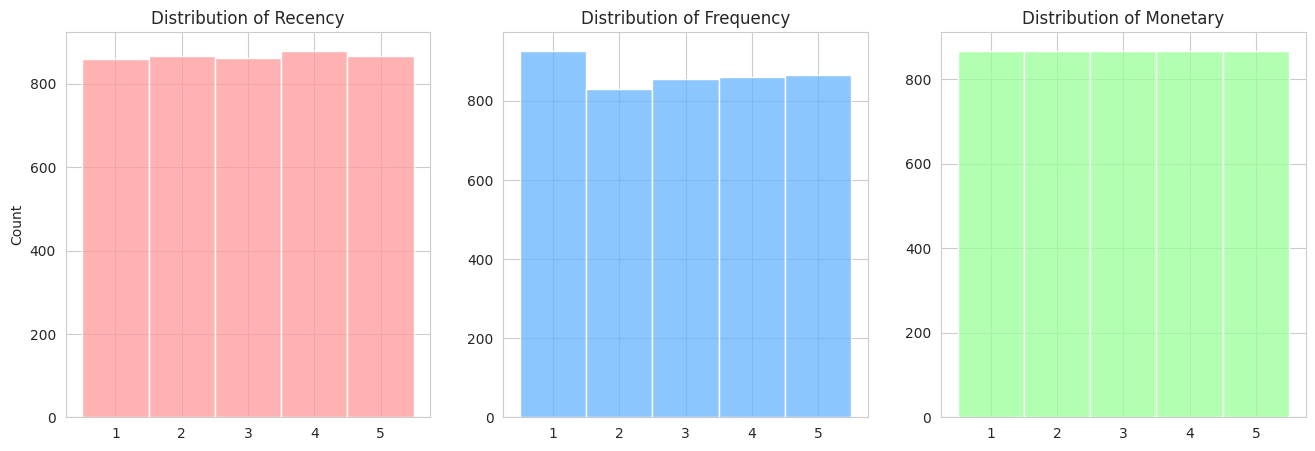

In [ ]:
# Set the style and color palette
sns.set_style('whitegrid')
palette_color = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot the distribution of Recency
sns.histplot(new_ecom_rfm['R'], ax=axes[0], bins=5, color=palette_color[0])
axes[0].set_title('Distribution of Recency')
axes[0].set_xlabel('')
axes[0].set_ylabel('Count')

# Plot the distribution of Frequency
sns.histplot(new_ecom_rfm['F'], ax=axes[1], bins=5, color=palette_color[1])
axes[1].set_title('Distribution of Frequency')
axes[1].set_xlabel('')
axes[1].set_ylabel('')


# Plot the distribution of Monetary
sns.histplot(new_ecom_rfm['M'], ax=axes[2], bins=5, color=palette_color[2])
axes[2].set_title('Distribution of Monetary')
axes[2].set_xlabel('')
axes[2].set_ylabel('')


# Display the plot
plt.show()

## Step 4.2: Visualize treemap of RFM

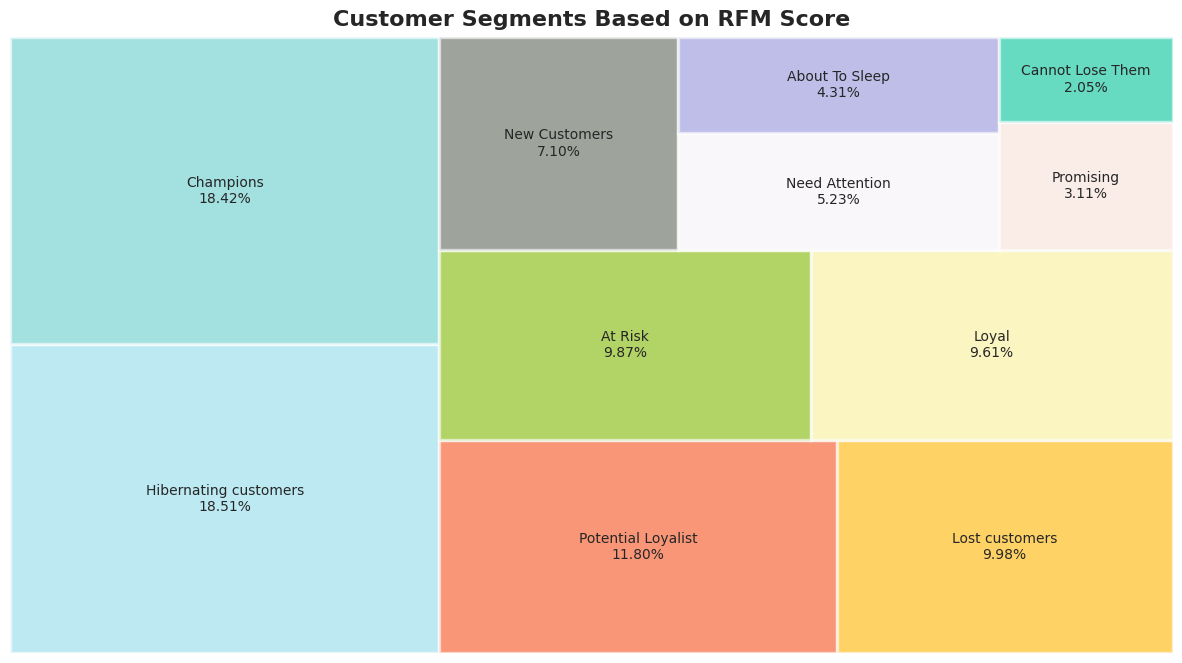

In [ ]:
colors = ['#91DCEA', '#64CDCC','#F6511D','#FFB400','#7FB800','#F7EF99','#5D675B','#F5F3F5','#9593D9','#F7E1D7','#00C49A']
fig, ax = plt.subplots(1, figsize=(15,8))
# Calculate the portion of each segment
segment_counts = new_ecom_rfm['Segment'].value_counts()
portion = segment_counts / segment_counts.sum()

# Calculate the percentage for each segment and round it to 1-2 decimal points
percentage = portion * 100.0
percentage = percentage.round(2)

# Create labels with segment names and percentages
labels = [f"{segment}\n{percent:.2f}%" for segment, percent in zip(segment_counts.index, percentage)]

# Create the treemap
squarify.plot(sizes=percentage,
              label=labels,
              color=colors[:len(segment_counts)],
              alpha=0.6,
              bar_kwargs=dict(linewidth=2.4, edgecolor="white"),
              )


plt.title("Customer Segments Based on RFM Score",
          fontsize=16,
          pad=8,
          fontweight='bold'
)
plt.axis('off')
plt.show()

## Step 4.3: Recommendation


In [ ]:
recommendation = {
    'Segment Name': [
        'Hibernating customers (18.63%)', 'Champions (18.42%)', 'Potential Loyalist (11.85%)', 'At Risk (9.98%)',
        'Lost customers (9.77%)', 'Loyal (9.64%)', 'New Customers (6.98%)', 'Need Attention (5.23%)',
        'About To Sleep (4.40%)', 'Promising (3.09%)', 'Cannot Lose Them (2.01%)'
    ],
    'Characteristics': [
        'Low recency, low frequency, low monetary',
        'High recency, high frequency, high monetary',
        'Medium recency, medium frequency, medium monetary',
        'High recency, low frequency, high monetary',
        'Very low recency, low frequency, low monetary',
        'High recency, high frequency, high monetary',
        'High recency, low frequency, low monetary',
        'Medium recency, medium frequency, medium monetary',
        'Low recency, low frequency, low monetary',
        'High recency, low frequency, medium monetary',
        'Low recency, low frequency, high monetary'
    ],
    'Recommendations': [
        'Reactivate with targeted campaigns to this segment since it takes the most portion',
        'Reward loyalty, upsell, cross-sell more to this segment since it takes the second place',
        'Nurture with personalized offers, this segment takes top 3',
        'Engage to prevent churn, top 4 in the portion should not be overlooked',
        'Winback with attractive offers with the top 5 segment',
        'Maintain satisfaction, upsell, cross-sell',
        'Welcome and onboard effectively',
        'Provide incentives to increase purchases',
        'Reactivate before they churn',
        'Convert to loyal customers',
        'Retain with exceptional service'
    ]
}

# Create the DataFrame
recommendation = pd.DataFrame(recommendation)
recommendation

,Segment Name,Characteristics,Recommendations
0,Hibernating customers (18.63%),"Low recency, low frequency, low monetary",Reactivate with targeted campaigns to this seg...
1,Champions (18.42%),"High recency, high frequency, high monetary","Reward loyalty, upsell, cross-sell more to thi..."
2,Potential Loyalist (11.85%),"Medium recency, medium frequency, medium monetary","Nurture with personalized offers, this segment..."
3,At Risk (9.98%),"High recency, low frequency, high monetary","Engage to prevent churn, top 4 in the portion ..."
4,Lost customers (9.77%),"Very low recency, low frequency, low monetary",Winback with attractive offers with the top 5 ...
5,Loyal (9.64%),"High recency, high frequency, high monetary","Maintain satisfaction, upsell, cross-sell"
6,New Customers (6.98%),"High recency, low frequency, low monetary",Welcome and onboard effectively
7,Need Attention (5.23%),"Medium recency, medium frequency, medium monetary",Provide incentives to increase purchases
8,About To Sleep (4.40%),"Low recency, low frequency, low monetary",Reactivate before they churn
9,Promising (3.09%),"High recency, low frequency, medium monetary",Convert to loyal customers


# Conclusion

Nhìn chung, sự tương quan giữa ba chỉ số Recency, Frequency, Monetary tương quan nhau rất rõ rệt trong trường hợp này (nếu 1 trong 3 chỉ số tích cực thì sẽ tác động 2 chỉ số còn lại và ngược lại). Ngoài ra, lượng phân bổ của 3 chỉ số trên cũng rất cân bằng cho thấy tập khách hàng của doanh nghiệp đều trải dài đều nhau qua các segment.

Một vài đề xuất để phát triển nhóm top khách hàng của SuperStore như sau:

*   **Nhóm Champions** : Tập trung duy trì với nhóm khách hàng trên, liên tục engage với họ với các ưu đãi, đem đến cho họ những khuyến mãi thiết kế đặc biệt cho họ để thúc giục họ quay lại mua hàng đều đặn
*  **Nhóm Potential Loyalist**: Kích thích nhóm khách hàng này quay lại mua hàng để khiến họ trở thành nhóm Champions vì RFM tương quan, chỉ cần tác động tích cực tới chỉ số R hoặc F (bằng các đưa ra các ưu đãi, sự kiện hấp dẫn, hỗ trợ tốt trong dịch vụ khách hàng khi mua hàng), khả năng cao sẽ tác động tích cực đến 2 yếu tố còn lại (M và R hoặc M và F).
*  **Nhóm Hibernating customers**: Tái kích hoạt tương tác mua hàng thông qua khuyến mãi, marketing, sales đa kênh, từ đó làm phát triển lại awareness của nhóm khách hàng này về các sản phẩm và ưu đãi mới. Từng bước phát triển mối quan hệ với họ, để họ thường xuyên tiêu dùng vì đây không phải là nhóm khách hàng đổ dồn nhiều tiền vào một lần mua mà cần có nhiều kiên nhẫn để tạo mối liên kết mua hàng bền vững.  

Cuối cùng, các **nhóm khách hàng khác** cũng không được ngó lơ, **mục tiêu là khiến họ có tương tác mua hàng thường xuyên và liên tục** trong một thời gian, điều đó sẽ ảnh hưởng rất nhiều đến doanh thu của công ty. Đối với phòng ban Marketing, lời khuyên là nên tạo ra những chiến lược tiếp thị thật sự thu hút và bắt kịp xu hướng (video, quiz,...) để thúc đẩy việc mua hàng.


